In [ ]:
import os
import requests
from tqdm import tqdm
import zipfile
from pandas import read_csv
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv1D, Flatten
from keras.layers import Conv1D, MaxPooling1D

from keras.utils import to_categorical
import matplotlib.pyplot as plt




In [ ]:
# Definition fonction
print("####### LOCALIZATION")

def download_data():
    url="https://github.com/JJAlmagro/subcellular_localization/raw/refs/heads/master/notebook%20tutorial/data/reduced_train.npz"
    datasetFolderPath = "dataset/"
    file = "reduced_train.npz"
    FilePath = os.path.join(datasetFolderPath, file)

    if not os.path.exists(datasetFolderPath):
        os.makedirs(datasetFolderPath)

    def download_file(url, filename):
        response = requests.get(url, stream=True)
        with tqdm.wrapattr(open(filename, "wb"), "write", miniters=1,
                           total=int(response.headers.get('content-length', 0)),
                           desc=filename) as fout:
            for chunk in response.iter_content(chunk_size=4096):
                fout.write(chunk)

    # Download the zip file if it does not exist
    if not os.path.exists(FilePath):
        download_file(url, FilePath)


####### LOCALIZATION


In [ ]:
# Chargement des données
download_data()

In [ ]:
# Traitement des données
file_data_train = "dataset/reduced_train.npz"

train = np.load(file_data_train)
X_train = train["X_train"]
Y = train["y_train"]
mask_train = train["mask_train"]

# Print these to visualize.
print("Shape of dataset X")
print(X.shape)
print("Shape of dataset Y")
print(Y.shape)
print("Shape of dataset Mask")
print(mask_train.shape)
classes = preprocessing.LabelEncoder()
classes.fit(Y)
classes_Y = classes.transform(Y)

onehot_Y = to_categorical(classes_Y)

print("First 5 rows of X_train:\n", X[:5])
print("First 5 elements of Y (original):\n", Y[:5])
print("First 5 rows of mask_train:\n", mask_train[:5])

print("First 5 rows of one-hot encoded Y:\n", onehot_Y[:5])

Shape of dataset X
(2423, 400, 20)
Shape of dataset Y
(2423,)
Shape of dataset Mask
(2423, 400)
First 5 rows of X_train:
 [[[0.   0.   0.   ... 0.   0.   0.  ]
  [1.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.48 0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.   0.   0.   ... 0.   0.   0.  ]
  [1.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.   0.   0.   ... 0.   0.   0.  ]
  [1.   0.   0.   ... 0.   0.   0.  ]
  [1.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.  

In [ ]:
# Example: Statistics for the first feature across all samples and time points
df = pd.DataFrame(X_train[:, :, 0])
stats = df.describe()
print(stats)

               0            1            2            3            4    \
count  2423.000000  2423.000000  2423.000000  2423.000000  2423.000000   
mean      0.021865     0.205510     0.099270     0.075233     0.088902   
std       0.114765     0.298014     0.175479     0.142319     0.156582   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.050000     0.020000     0.020000     0.030000   
75%       0.000000     0.300000     0.120000     0.090000     0.100000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               5            6            7            8            9    ...  \
count  2423.000000  2423.000000  2423.000000  2423.000000  2423.000000  ...   
mean      0.085184     0.093553     0.089930     0.100896     0.099030  ...   
std       0.145490     0.159008     0.150393     0.156734     0.152685  ...   
min       0.00000

In [ ]:
# Passage de Y en OneHot
y = onehot_Y[:len(df)]
y.shape

(2423, 10)

In [ ]:
# Répartition du jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

NameError: name 'y' is not defined

Shape of dataset X: (2423, 400, 20)
Shape of dataset Y: (2423,)
Shape of dataset Mask: (2423, 400)
First 5 rows of X_train:
 [[[0.   0.   0.   ... 0.   0.   0.  ]
  [1.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.48 0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.   0.   0.   ... 0.   0.   0.  ]
  [1.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.   0.   0.   ... 0.   0.   0.  ]
  [1.   0.   0.   ... 0.   0.   0.  ]
  [1.   0.   0.   ... 0.   0.   0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                     │ (None, 400, 60)             │           1,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 400, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 400, 128)            │           7,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 200, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 200, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 200, 256)            │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 100, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 100, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 100, 128)            │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │          64,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,998 (542.96 KB)

 Trainable params: 138,998 (542.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 427ms/step - accuracy: 0.2050 - loss: 2.1887 - val_accuracy: 0.2191 - val_loss: 2.0398
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 385ms/step - accuracy: 0.2525 - loss: 2.0234 - val_accuracy: 0.2423 - val_loss: 1.9975
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 393ms/step - accuracy: 0.2675 - loss: 1.9769 - val_accuracy: 0.3196 - val_loss: 1.8664
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 545ms/step - accuracy: 0.3331 - loss: 1.8199 - val_accuracy: 0.3969 - val_loss: 1.7446
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 494ms/step - accuracy: 0.4269 - loss: 1.6510 - val_accuracy: 0.4768 - val_loss: 1.6125
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 399ms/step - accuracy: 0.4752 - loss: 1.5244 - val_accuracy: 0.4716 - val_loss: 1.5328
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 495ms/step - accuracy: 0.5189 - loss: 1.4101 - val_accuracy: 0.5180 - val_loss: 1.4071
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 529ms/step - accuracy: 0.5910 - loss: 1.2222 - val_accuracy

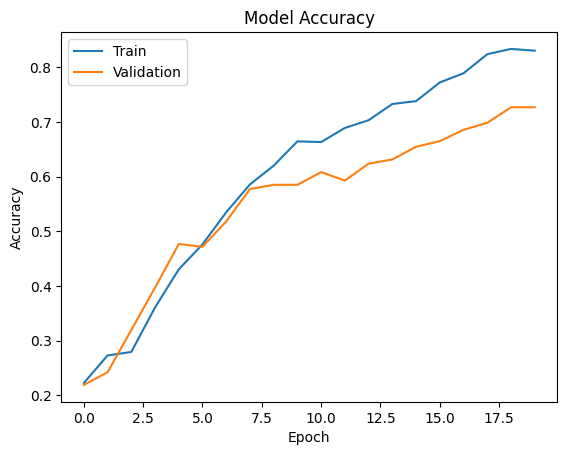

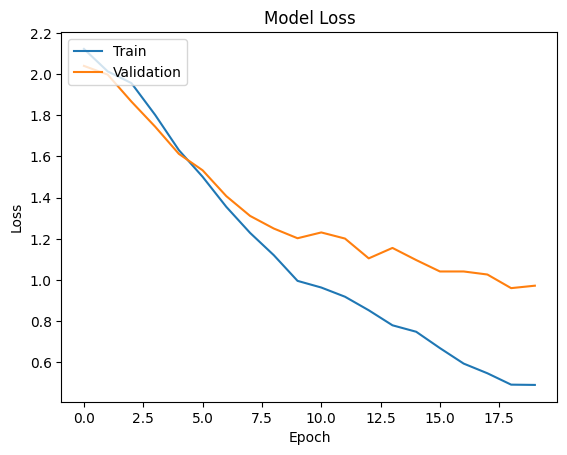

In [ ]:

# Build the model
model = Sequential()
model.add(Dense(60, input_shape=(400, 20), kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())  # Flatten the (400, 256) output into (None, 400 * 256) before final dense layer
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2)

# Evaluate the model on test data
scores = model.evaluate(X_test, y_test)
print("Neural network accuracy: %.2f%%" % (scores[1] * 100))

# Plot training & validation accuracy values
print(history.history.keys())

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Train the model with validation data
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2)

# Evaluate the model on test data
scores = model.evaluate(X_test, y_test)
print("Neural network accuracy: %.2f%%" % (scores[1] * 100))

# Plot training & validation accuracy values
print(history.history.keys())

In [ ]:
# Affichage Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Affichage Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()